In [56]:
import pandas as pd
import os
import csv
from datetime import datetime

In [118]:
# Load raw data
df3 = pd.read_csv("Sales_data.csv")

In [162]:
df3.shape

(9665, 15)

In [164]:
# 1. Handle missing values
# Drop rows missing critical values required for analysis
df3.dropna(subset=['Sales', 'Quantity', 'Product ID', 'Order Date'], inplace=True)

In [168]:
df3.shape

(9665, 15)

In [190]:
#  2. Convert to proper data types
# Convert 'Order Date' to datetime format
df3['Order Date'] = pd.to_datetime(df3['Order Date'], errors='coerce')
#df.dropna(subset=['Order Date'], inplace=True)

In [192]:
df3.shape

(9665, 15)

In [170]:
# Convert numerical fields to appropriate types
df3['Sales'] = pd.to_numeric(df3['Sales'], errors='coerce')
df3['Quantity'] = pd.to_numeric(df3['Quantity'], errors='coerce')
df3['Price'] = pd.to_numeric(df3['Price'], errors='coerce')

In [172]:
#  3. Remove rows with 0 or negative sales/quantity
df3 = df3[(df3['Sales'] > 0) & (df3['Quantity'] > 0)]

In [174]:
df3.shape

(9665, 15)

In [180]:
#  4. Clean and standardize text fields
text_cols = ['Customer Name', 'Product Name', 'Category', 'SubCategory', 'Region', 'State', 'Country']
for col in text_cols:
    df3[col] = df3[col].str.strip().str.title()

In [182]:
df3.shape

(9665, 15)

In [194]:
# 5. Filter dataset for analysis range (2015–2018)
df3 = df3[df3['Order Date'].dt.year.between(2015, 2018)]

In [196]:
df3.shape

(9665, 15)

In [198]:
# 6. Create helper time-based columns
df3['Year'] = df3['Order Date'].dt.year
df3['Month'] = df3['Order Date'].dt.month
df3['YearMonth'] = df3['Order Date'].dt.to_period('M')

In [200]:
df3.shape

(9665, 18)

In [202]:
# Output snapshot
print(f"Cleaned dataset shape: {df3.shape}")
df3.dtypes

Cleaned dataset shape: (9665, 18)


Order ID                 object
Order Date       datetime64[ns]
Customer ID               int64
Customer Name            object
City                     object
State                    object
Region                   object
Country                  object
Product ID               object
Product Name             object
SubCategory              object
Category                 object
Quantity                  int64
Sales                   float64
Price                   float64
Year                      int32
Month                     int32
YearMonth             period[M]
dtype: object

In [206]:
df3.shape

(9665, 18)

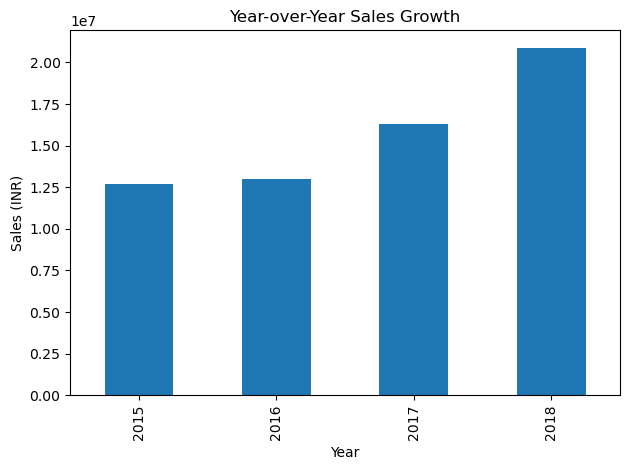

In [218]:
# Yearly sales bar chart
import matplotlib.pyplot as plt
df3.groupby('Year')['Sales'].sum().plot(kind='bar', title='Year-over-Year Sales Growth', ylabel='Sales (INR)')
plt.tight_layout()
plt.show()

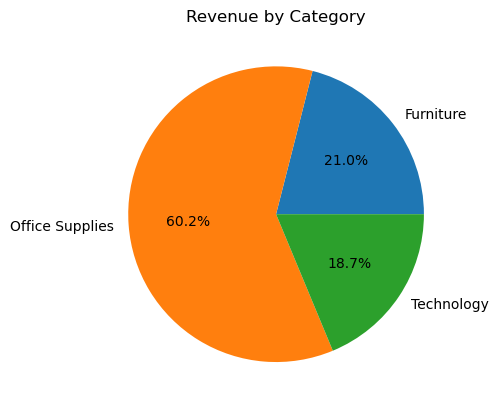

In [220]:
# Pie chart of category revenue
category_df = df3.groupby('Category')['Sales'].sum()
category_df.plot.pie(autopct='%1.1f%%', title='Revenue by Category')
plt.ylabel('')
plt.show()

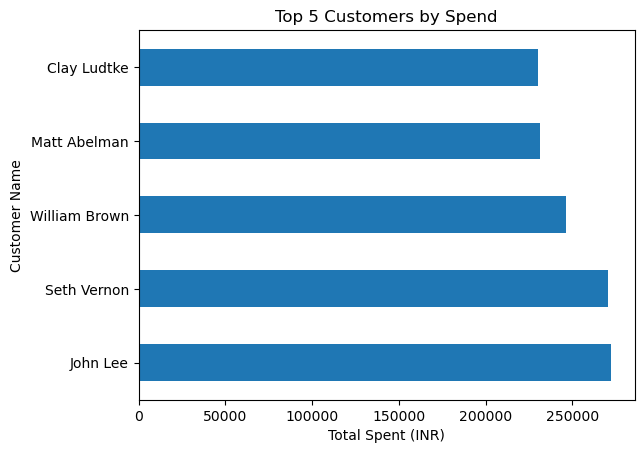

In [222]:
# Top 5 customer spenders
top_customers = df3.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='barh', title='Top 5 Customers by Spend')
plt.xlabel('Total Spent (INR)')
plt.show()

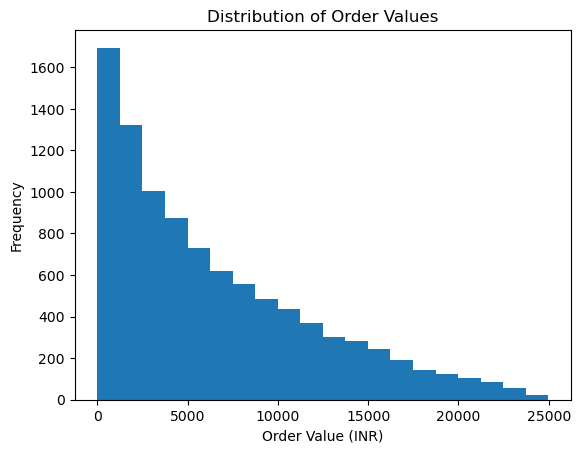

In [224]:
# Histogram of average order values
avg_order = df3.groupby('Order ID')['Sales'].sum()
avg_order.plot.hist(bins=20, title='Distribution of Order Values')
plt.xlabel('Order Value (INR)')
plt.show()

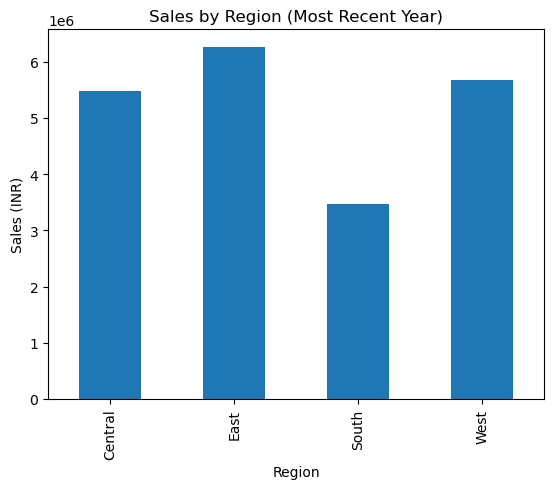

In [226]:
# Sales by region in latest year
latest_year = df3['Order Date'].dt.year.max()
latest_df = df3[df3['Order Date'].dt.year == latest_year]
latest_df.groupby('Region')['Sales'].sum().plot(kind='bar', title='Sales by Region (Most Recent Year)')
plt.ylabel('Sales (INR)')
plt.show()